In [66]:
import pandas as pd

pd.set_option("display.max_columns", None)

In [67]:
# Get basic info and descriptive statistics
data = pd.read_csv("data/cancer_data.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109232 entries, 0 to 109231
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Age                       109232 non-null  int64 
 1   Gender                    109232 non-null  object
 2   Air Pollution             109232 non-null  int64 
 3   Alcohol Usage             109232 non-null  int64 
 4   Dust Allergy              109232 non-null  int64 
 5   Occupational Hazards      109232 non-null  int64 
 6   Genetic Risk              109232 non-null  int64 
 7   Chronic Lung Disease      109232 non-null  int64 
 8   Balanced Diet             109232 non-null  int64 
 9   Obesity                   109232 non-null  int64 
 10  Smoking                   109232 non-null  int64 
 11  Passive Smoker            109232 non-null  int64 
 12  Chest Pain                109232 non-null  int64 
 13  Coughing of Blood         109232 non-null  int64 
 14  Fati

Age  Air Pollution  Alcohol Usage   Dust Allergy  \
count  109232.000000  109232.000000  109232.000000  109232.000000   
mean       42.408122       3.609318       4.300910       4.805945   
std        14.652441       1.961804       2.524127       2.061606   
min        14.000000       1.000000       1.000000       1.000000   
25%        32.000000       2.000000       2.000000       3.000000   
50%        42.000000       3.000000       4.000000       5.000000   
75%        53.000000       6.000000       7.000000       7.000000   
max        73.000000       8.000000       8.000000       8.000000   

       Occupational Hazards   Genetic Risk  Chronic Lung Disease  \
count         109232.000000  109232.000000         109232.000000   
mean               4.607761       4.340981              4.181568   
std                2.140366       2.125546              1.890349   
min                1.000000       1.000000              1.000000   
25%                3.000000       2.000000              2.000000   
50%                5.000000       4.000000              4.000000   
75%                7.000000       7.000000              6.000000   
max                8.000000       7.000000              7.000000   

       Balanced Diet        Obesity        Smoking  Passive Smoker  \
count  109232.000000  109232.000000  109232.000000   109232.000000   
mean        4.393209       4.306559       4.114701        4.296140   
std         2.130056       2.091315       2.377571        2.275301   
min         1.000000       1.000000       1.000000        1.000000   
25%         2.000000       3.000000       2.000000        2.000000   
50%         4.000000       4.000000       3.000000        4.000000   
75%         7.000000       7.000000       7.000000        7.000000   
max         7.000000       7.000000       8.000000        8.000000   

          Chest Pain  Coughing of Blood        Fatigue    Weight Loss  \
count  109232.000000      109232.000000  109232.000000  109232.000000   
mean        4.448678           4.671406       3.783177       3.615424   
std         2.382707           2.387395       2.278390       2.108571   
min         1.000000           1.000000       1.000000       1.000000   
25%         2.000000           3.000000       2.000000       2.000000   
50%         4.000000           4.000000       3.000000       3.000000   
75%         7.000000           7.000000       5.000000       5.000000   
max         9.000000           9.000000       9.000000       8.000000   

       Shortness of Breath       Wheezing  Swallowing Difficulty  \
count        109232.000000  109232.000000          109232.000000   
mean              4.033186       3.648372               4.039659   
std               2.153052       2.057725               2.058959   
min               1.000000       1.000000               1.000000   
25%               2.000000       2.000000               2.000000   
50%               4.000000       4.000000               4.000000   
75%               6.000000       5.000000               5.000000   
max               9.000000       8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold      Dry Cough        Snoring  
count             109232.000000  109232.000000  109232.000000  109232.000000  
mean                   3.734199       3.323193       3.389620       3.010244  
std                    2.272890       1.856778       2.013752       1.678741  
min                    1.000000       1.000000       1.000000       1.000000  
25%                    2.000000       2.000000       2.000000       2.000000  
50%                    3.000000       3.000000       3.000000       3.000000  
75%                    5.000000       4.000000       5.000000       4.000000  
max                    9.000000       7.000000       7.000000       7.000000

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="viridis")
level_palette = {"Normal": "#50C878", "Benign": "#FFD700", "Malignant": "#E0115F"}
level_order = ["Normal", "Benign", "Malignant"]

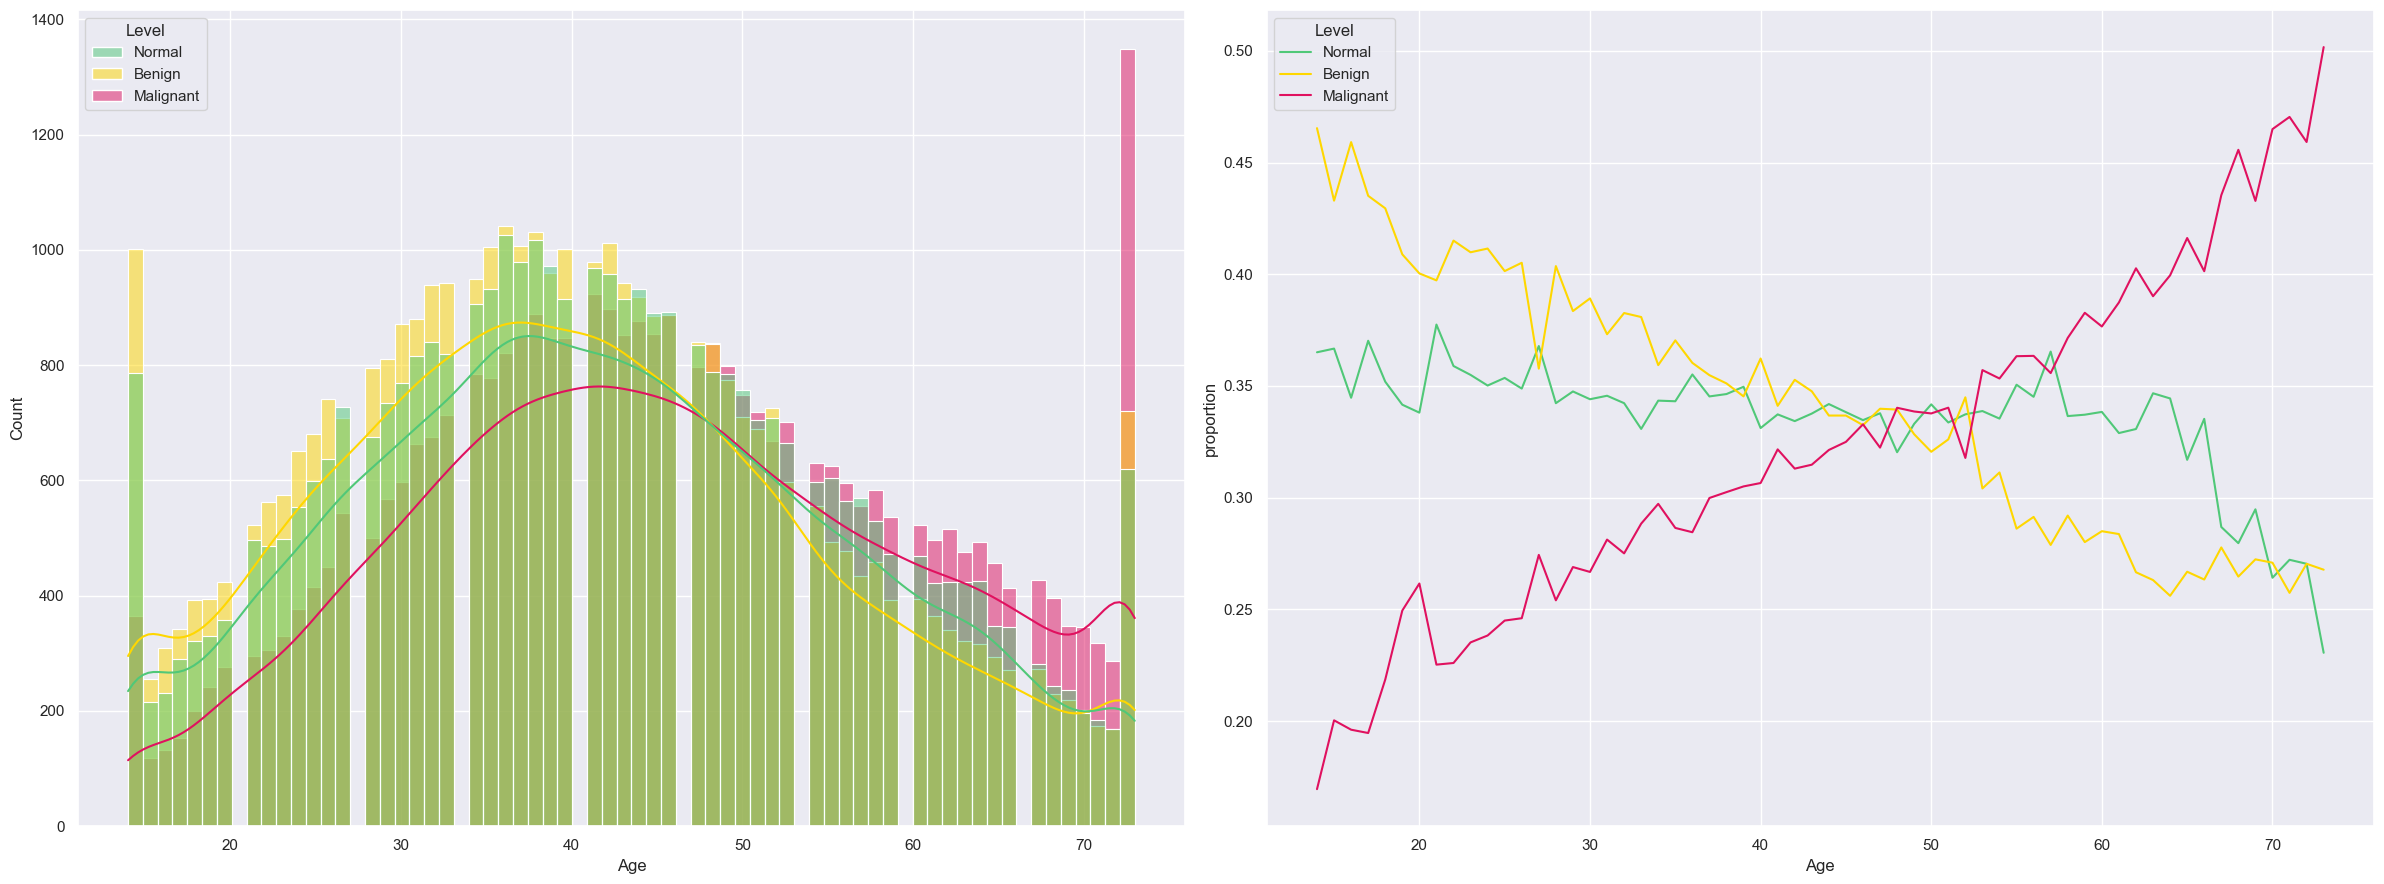

In [69]:
# Visualizing numerical columns
fig, axs = plt.subplots(1, 2, figsize=(24, 9))
sns.histplot(
    data,
    x="Age",
    hue="Level", hue_order=level_order,
    kde=True,
    palette=level_palette,
    ax=axs[0]
)
sns.lineplot(
    data.groupby("Age")["Level"].value_counts(normalize=True).to_frame(),
    x="Age", y="proportion",
    hue="Level", hue_order=level_order,
    palette=level_palette,
    ax=axs[1]
)
fig.tight_layout()
plt.show()

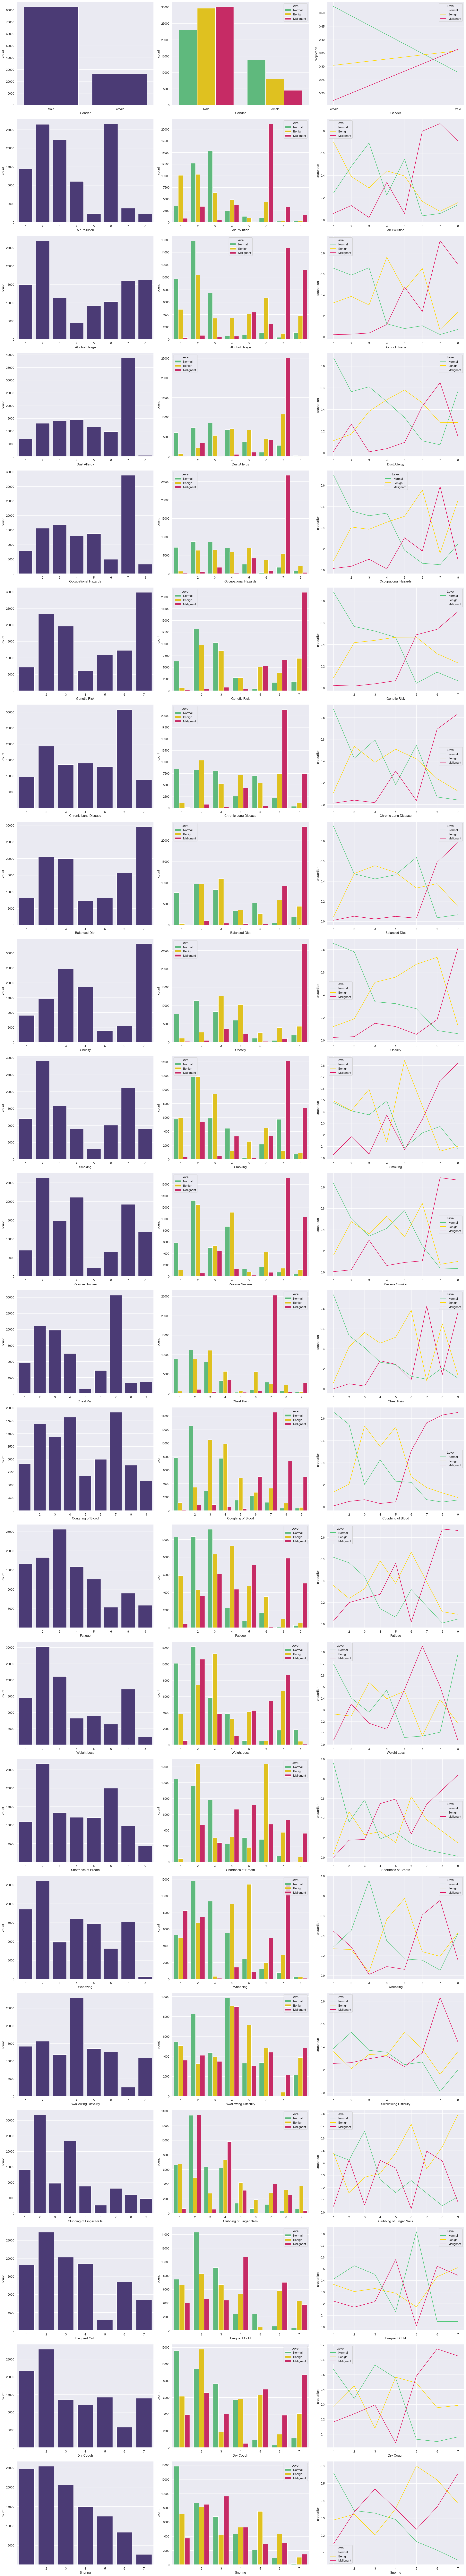

In [70]:
# Visualizing categorical columns
fig, axs = plt.subplots(22, 3, figsize=(24, 132))
for i, col in enumerate(data.columns[1:-1]):
    sns.countplot(data, x=col, ax=axs[i, 0])
    sns.countplot(
        data,
        x=col,
        hue="Level", hue_order=level_order,
        palette=level_palette,
        ax=axs[i, 1]
    )
    sns.lineplot(
        data.groupby(col)["Level"].value_counts(normalize=True).to_frame(),
        x=col, y="proportion",
        hue="Level", hue_order=level_order,
        palette=level_palette,
        ax=axs[i, 2]
    )
fig.tight_layout()
plt.show()

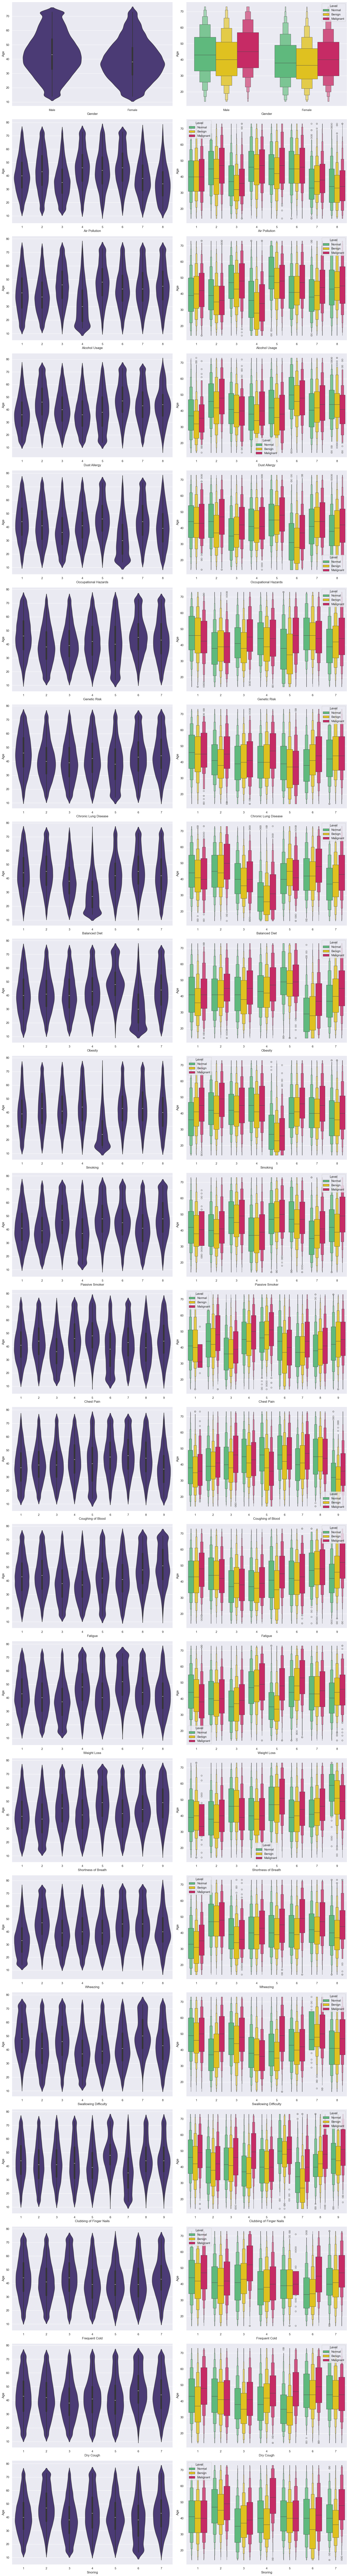

In [74]:
# Visualizing relationship between numerical columns and categorical columns
fig, axs = plt.subplots(22, 2, figsize=(18, 132))
for i, col in enumerate(data.columns[1:-1]):
    sns.violinplot(
        data,
        x=col, y="Age",
        ax=axs[i, 0]
    )
    sns.boxenplot(
        data,
        x=col, y='Age',
        hue="Level", hue_order=level_order,
        palette=level_palette,
        ax=axs[i, 1]
    )
fig.tight_layout()
plt.show()

In [72]:
# Encoding for correlation visualization
encoded_data = data.replace(
    {
        "Gender": {"Male": 0, "Female": 1},
        "Level": {"Normal": 0, "Benign": 1, "Malignant": 2}
    }
)

C:\Users\cryst\AppData\Local\Temp\ipykernel_14464\3863905989.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_data = data.replace(


<Axes: >

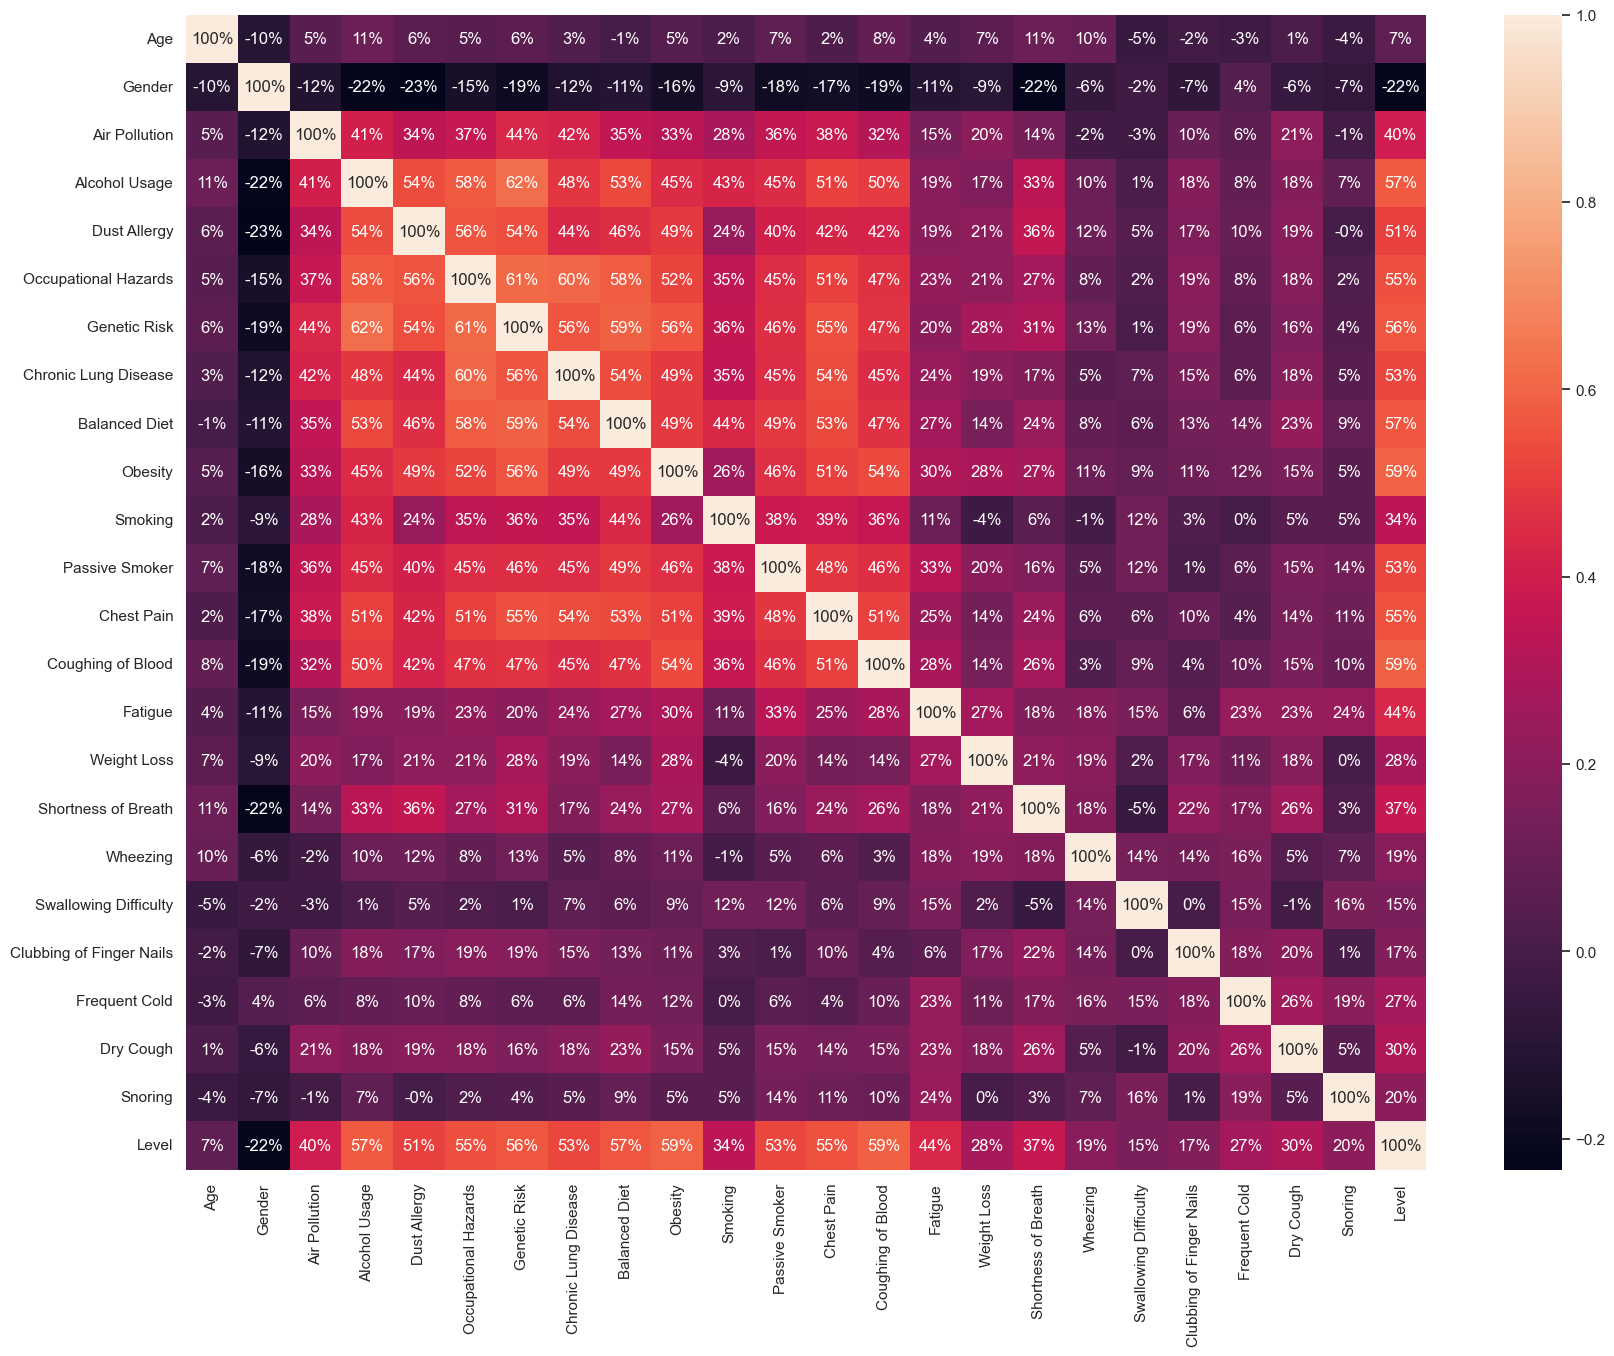

In [73]:
# View correlation between variables
plt.figure(figsize=(20, 15))
sns.heatmap(encoded_data.corr("kendall"), annot=True, fmt=".0%")